In [65]:
import matplotlib.pyplot as plt
import pandas as pd

## 1 Meter From Robot Trial

In [84]:
cone_bag1m = pd.read_csv("cone_bag1m.csv")
title_1m = "Park 1m From Cone"

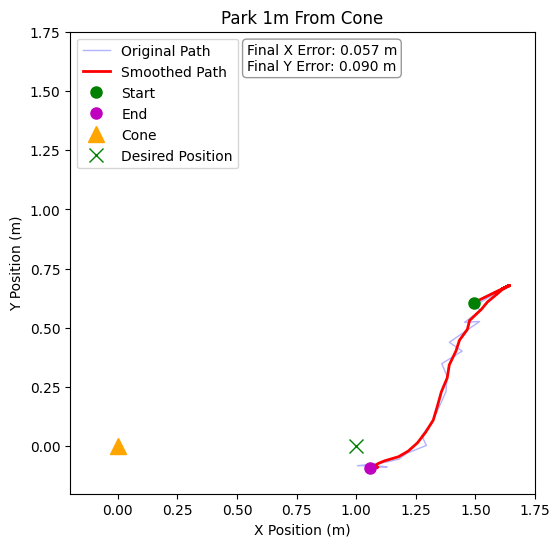

In [118]:
window_size = 5 
cone_bag1m_smooth = cone_bag1m.copy()
cone_bag1m_smooth['x_pos_smooth'] = cone_bag1m['x_pos'].rolling(window=window_size, center=True).mean()
cone_bag1m_smooth['y_pos_smooth'] = cone_bag1m['y_pos'].rolling(window=window_size, center=True).mean()

# Fill NaN values at the beginning and end (created by rolling window)
cone_bag1m_smooth['x_pos_smooth'] = cone_bag1m_smooth['x_pos_smooth'].fillna(cone_bag1m_smooth['x_pos'])
cone_bag1m_smooth['y_pos_smooth'] = cone_bag1m_smooth['y_pos_smooth'].fillna(cone_bag1m_smooth['y_pos'])

# Plot original vs smoothed path
plt.figure(figsize=(6, 6))
plt.plot(cone_bag1m['x_pos'], cone_bag1m['y_pos'], 'b-', linewidth=1, alpha=0.3, label='Original Path')
plt.plot(cone_bag1m_smooth['x_pos_smooth'], cone_bag1m_smooth['y_pos_smooth'], 'r-', linewidth=2, label='Smoothed Path')
plt.plot(cone_bag1m['x_pos'][0], cone_bag1m['y_pos'][0], 'go', markersize=8, label='Start')
plt.plot(cone_bag1m['x_pos'].iloc[-1], cone_bag1m['y_pos'].iloc[-1], 'mo', markersize=8, label='End')

# Add target cone position (at origin since measurements are relative)
plt.plot(0, 0, '^', color='orange', markersize=12, label='Cone')

# Add desired position (1m from cone on x-axis)
plt.plot(1, 0, 'x', color='green', markersize=10, label='Desired Position')

# Calculate final x and y error from desired position (1,0)
final_x_error = abs(cone_bag1m['x_pos'].iloc[-1] - 1)  # Error from final x to desired x (1)
final_y_error = abs(cone_bag1m['y_pos'].iloc[-1] - 0)  # Error from final y to desired y (0)

# Place the legend in the upper left corner
legend = plt.legend(loc='upper left')

# Get the position of the legend
legend_bbox = legend.get_bbox_to_anchor().transformed(plt.gca().transAxes.inverted())
legend_right = legend_bbox.x1
legend_top = legend_bbox.y1

# Add error information to the plot - positioned to the right of the legend
plt.annotate(f'Final X Error: {final_x_error:.3f} m\nFinal Y Error: {final_y_error:.3f} m', 
             xy=(.38, 0.975), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title(title_1m)
plt.legend()
plt.ylim(-0.2, 1.75)  # Set y-axis limits
plt.xlim(-0.2, 1.75)  # Set x-axis limits

#plt.show()

plt.savefig('parking_controller_1m.png', dpi=300, bbox_inches='tight')

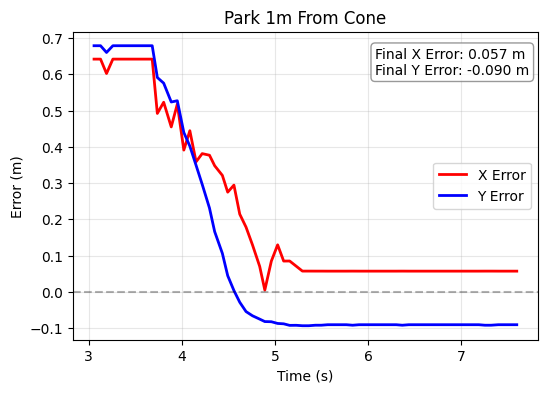

In [120]:
cone_bag1m['x_error'] = cone_bag1m['x_pos'] - 1  # Error from x position to desired x (1)
cone_bag1m['y_error'] = cone_bag1m['y_pos'] - 0  # Error from y position to desired y (0)

# Plot x and y error over time
plt.figure(figsize=(6, 4))
# Filter data to start at 3 seconds
mask = cone_bag1m['timestamp'] >= 3
plt.plot(cone_bag1m.loc[mask, 'timestamp'], cone_bag1m.loc[mask, 'x_error'], 'r-', linewidth=2, label='X Error')
plt.plot(cone_bag1m.loc[mask, 'timestamp'], cone_bag1m.loc[mask, 'y_error'], 'b-', linewidth=2, label='Y Error')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)  # Zero error reference line

plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title(title_1m)
plt.legend()
plt.grid(True, alpha=0.3)

# Add final error annotation
plt.annotate(f'Final X Error: {cone_bag1m["x_error"].iloc[-1]:.3f} m\nFinal Y Error: {cone_bag1m["y_error"].iloc[-1]:.3f} m', 
             xy=(0.65, 0.95), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.savefig('parking_controller_1m_error.png', dpi=300, bbox_inches='tight')

## 0.75 Meter From Robot Trial, Close

In [88]:
cone_bag075_close = pd.read_csv("cone_bag075mclose.csv")
title_075_close = "Park 0.75m From Cone, Starting Close to Cone"

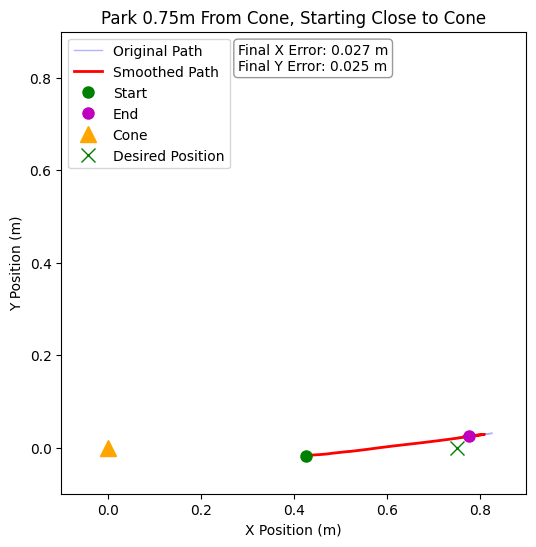

In [122]:
window_size = 3  
cone_bag075_close_smooth = cone_bag075_close.copy()
cone_bag075_close_smooth['x_pos_smooth'] = cone_bag075_close['x_pos'].rolling(window=window_size, center=True).mean()
cone_bag075_close_smooth['y_pos_smooth'] = cone_bag075_close['y_pos'].rolling(window=window_size, center=True).mean()

# Fill NaN values at the beginning and end (created by rolling window)
cone_bag075_close_smooth['x_pos_smooth'] = cone_bag075_close_smooth['x_pos_smooth'].fillna(cone_bag075_close_smooth['x_pos'])
cone_bag075_close_smooth['y_pos_smooth'] = cone_bag075_close_smooth['y_pos_smooth'].fillna(cone_bag075_close_smooth['y_pos'])

# Plot original vs smoothed path
plt.figure(figsize=(6, 6))
plt.plot(cone_bag075_close['x_pos'], cone_bag075_close['y_pos'], 'b-', linewidth=1, alpha=0.3, label='Original Path')
plt.plot(cone_bag075_close_smooth['x_pos_smooth'], cone_bag075_close_smooth['y_pos_smooth'], 'r-', linewidth=2, label='Smoothed Path')
plt.plot(cone_bag075_close['x_pos'][0], cone_bag075_close['y_pos'][0], 'go', markersize=8, label='Start')
plt.plot(cone_bag075_close['x_pos'].iloc[-1], cone_bag075_close['y_pos'].iloc[-1], 'mo', markersize=8, label='End')

# Add target cone position (at origin since measurements are relative)
plt.plot(0, 0, '^', color='orange', markersize=12, label='Cone')

# Add desired position (0.75m from cone on x-axis)
plt.plot(0.75, 0, 'x', color='green', markersize=10, label='Desired Position')

# Calculate final x and y error from desired position (0.75,0)
final_x_error = abs(cone_bag075_close['x_pos'].iloc[-1] - 0.75)  # Error from final x to desired x (0.75)
final_y_error = abs(cone_bag075_close['y_pos'].iloc[-1] - 0)  # Error from final y to desired y (0)

# Place the legend in the upper left corner
legend = plt.legend(loc='upper left')

# Get the position of the legend
legend_bbox = legend.get_bbox_to_anchor().transformed(plt.gca().transAxes.inverted())
legend_right = legend_bbox.x1
legend_top = legend_bbox.y1

# Add error information to the plot - positioned to the right of the legend
plt.annotate(f'Final X Error: {final_x_error:.3f} m\nFinal Y Error: {final_y_error:.3f} m', 
             xy=(.38, 0.975), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title(title_075_close)
plt.legend()
plt.xlim([-0.1, 0.9])
plt.ylim([-0.1, 0.9])
#plt.show()

plt.savefig('parking_controller_075m_close.png', dpi=300, bbox_inches='tight')

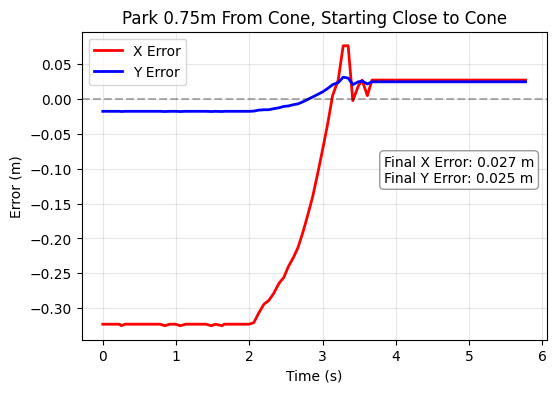

In [104]:
cone_bag075_close['x_error'] = cone_bag075_close['x_pos'] - 0.75  # Error from x position to desired x (0.75)
cone_bag075_close['y_error'] = cone_bag075_close['y_pos'] - 0  # Error from y position to desired y (0)

# Plot x and y error over time
plt.figure(figsize=(6, 4))
plt.plot(cone_bag075_close['timestamp'], cone_bag075_close['x_error'], 'r-', linewidth=2, label='X Error')
plt.plot(cone_bag075_close['timestamp'], cone_bag075_close['y_error'], 'b-', linewidth=2, label='Y Error')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)  # Zero error reference line

plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title(title_075_close)
plt.legend()
plt.grid(True, alpha=0.3)

# Add final error annotation
plt.annotate(f'Final X Error: {cone_bag075_close["x_error"].iloc[-1]:.3f} m\nFinal Y Error: {cone_bag075_close["y_error"].iloc[-1]:.3f} m', 
             xy=(0.65, 0.6), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.savefig('parking_controller_075m_close_error.png', dpi=300, bbox_inches='tight')

## 0.75 Meter From Robot Trial, Far

In [107]:
cone_bag075_far = pd.read_csv("cone_bag075mfar.csv")
title_075_far = "Park 0.75m From Cone, Starting Far from Cone"

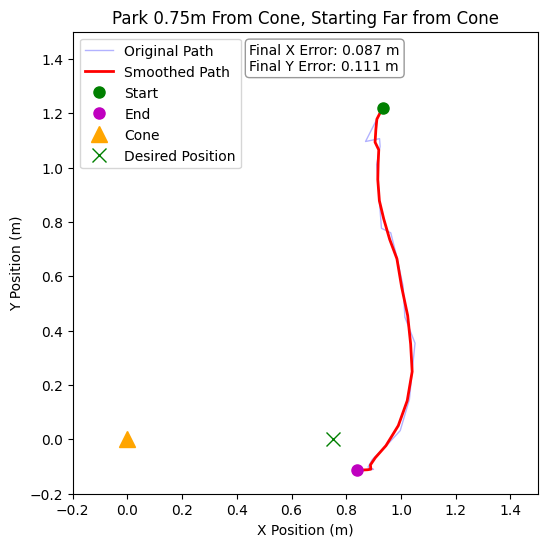

In [119]:
window_size = 3  
cone_bag075_far_smooth = cone_bag075_far.copy()
cone_bag075_far_smooth['x_pos_smooth'] = cone_bag075_far['x_pos'].rolling(window=window_size, center=True).mean()
cone_bag075_far_smooth['y_pos_smooth'] = cone_bag075_far['y_pos'].rolling(window=window_size, center=True).mean()

# Fill NaN values at the beginning and end (created by rolling window)
cone_bag075_far_smooth['x_pos_smooth'] = cone_bag075_far_smooth['x_pos_smooth'].fillna(cone_bag075_far_smooth['x_pos'])
cone_bag075_far_smooth['y_pos_smooth'] = cone_bag075_far_smooth['y_pos_smooth'].fillna(cone_bag075_far_smooth['y_pos'])

# Plot original vs smoothed path
plt.figure(figsize=(6, 6))
plt.plot(cone_bag075_far['x_pos'], cone_bag075_far['y_pos'], 'b-', linewidth=1, alpha=0.3, label='Original Path')
plt.plot(cone_bag075_far_smooth['x_pos_smooth'], cone_bag075_far_smooth['y_pos_smooth'], 'r-', linewidth=2, label='Smoothed Path')
plt.plot(cone_bag075_far['x_pos'][0], cone_bag075_far['y_pos'][0], 'go', markersize=8, label='Start')
plt.plot(cone_bag075_far['x_pos'].iloc[-1], cone_bag075_far['y_pos'].iloc[-1], 'mo', markersize=8, label='End')

# Add target cone position (at origin since measurements are relative)
plt.plot(0, 0, '^', color='orange', markersize=12, label='Cone')

# Add desired position (0.75m from cone on x-axis)
plt.plot(0.75, 0, 'x', color='green', markersize=10, label='Desired Position')

# Calculate final x and y error from desired position (0.75,0)
final_x_error = abs(cone_bag075_far['x_pos'].iloc[-1] - 0.75)  # Error from final x to desired x (0.75)
final_y_error = abs(cone_bag075_far['y_pos'].iloc[-1] - 0)  # Error from final y to desired y (0)

# Place the legend in the upper left corner
legend = plt.legend(loc='upper left')

# Get the position of the legend
legend_bbox = legend.get_bbox_to_anchor().transformed(plt.gca().transAxes.inverted())
legend_right = legend_bbox.x1
legend_top = legend_bbox.y1

# Add error information to the plot - positioned to the right of the legend
plt.annotate(f'Final X Error: {final_x_error:.3f} m\nFinal Y Error: {final_y_error:.3f} m', 
             xy=(.38, 0.975), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title(title_075_far)
plt.legend()
plt.xlim([-0.2, 1.5])
plt.ylim([-0.2, 1.5])
#plt.show()

plt.savefig('parking_controller_075m_far.png', dpi=300, bbox_inches='tight')

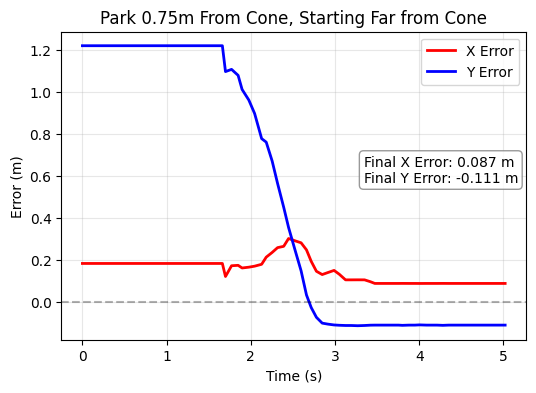

In [115]:
cone_bag075_far['x_error'] = cone_bag075_far['x_pos'] - 0.75  # Error from x position to desired x (0.75)
cone_bag075_far['y_error'] = cone_bag075_far['y_pos'] - 0  # Error from y position to desired y (0)

# Plot x and y error over time
plt.figure(figsize=(6, 4))
plt.plot(cone_bag075_far['timestamp'], cone_bag075_far['x_error'], 'r-', linewidth=2, label='X Error')
plt.plot(cone_bag075_far['timestamp'], cone_bag075_far['y_error'], 'b-', linewidth=2, label='Y Error')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)  # Zero error reference line

plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title(title_075_far)
plt.legend()
plt.grid(True, alpha=0.3)

# Add final error annotation
plt.annotate(f'Final X Error: {cone_bag075_far["x_error"].iloc[-1]:.3f} m\nFinal Y Error: {cone_bag075_far["y_error"].iloc[-1]:.3f} m', 
             xy=(0.65, 0.6), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             va='top')

plt.savefig('parking_controller_075m_far_error.png', dpi=300, bbox_inches='tight')